In [1]:
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
import seaborn as sns
import os

2023-07-12 16:32:35.884927: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
# load the mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

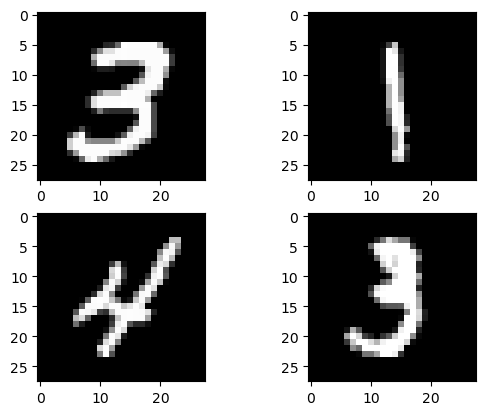

In [3]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[7], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[8], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[9], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[10], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [4]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [5]:
# define the CNN model
def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(num_classes, activation='softmax'))
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])
    
    return model

In [6]:
# build the model
model = cnn_model()

# fit the model
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

2023-07-12 16:32:44.376051: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-07-12 16:32:44.394379: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-07-12 16:32:45.083728: E tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:927] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-12 16:32:45.083857: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1050 computeCapability: 6.1
coreClock: 1.493GHz coreCount: 5 deviceMemorySize: 2.00GiB deviceMemoryBandwidth: 104.43GiB/s
2023-07-12 16:32:45.083896: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-07-12 16:32:45.148341: I tensorflow/stream_executor/platfor

Epoch 1/10


2023-07-12 16:32:50.700884: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-07-12 16:32:51.796009: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7


300/300 - 12s - loss: 0.1754 - accuracy: 0.9457 - val_loss: 0.0406 - val_accuracy: 0.9871
Epoch 2/10
300/300 - 6s - loss: 0.0458 - accuracy: 0.9856 - val_loss: 0.0319 - val_accuracy: 0.9898
Epoch 3/10
300/300 - 7s - loss: 0.0305 - accuracy: 0.9904 - val_loss: 0.0262 - val_accuracy: 0.9916
Epoch 4/10
300/300 - 7s - loss: 0.0239 - accuracy: 0.9923 - val_loss: 0.0228 - val_accuracy: 0.9922
Epoch 5/10
300/300 - 6s - loss: 0.0183 - accuracy: 0.9942 - val_loss: 0.0229 - val_accuracy: 0.9922
Epoch 6/10
300/300 - 7s - loss: 0.0146 - accuracy: 0.9953 - val_loss: 0.0219 - val_accuracy: 0.9928
Epoch 7/10
300/300 - 6s - loss: 0.0128 - accuracy: 0.9959 - val_loss: 0.0222 - val_accuracy: 0.9929
Epoch 8/10
300/300 - 7s - loss: 0.0093 - accuracy: 0.9970 - val_loss: 0.0288 - val_accuracy: 0.9922
Epoch 9/10
300/300 - 7s - loss: 0.0085 - accuracy: 0.9972 - val_loss: 0.0214 - val_accuracy: 0.9929
Epoch 10/10
300/300 - 7s - loss: 0.0086 - accuracy: 0.9972 - val_loss: 0.0250 - val_accuracy: 0.9932


In [7]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 0.68%


In [8]:
models_path = "./idx_models"

os.makedirs(models_path, exist_ok=True)

# get the number of files in the directory
def get_num_files(path):
    if not os.path.exists(path):
        return 0
    return sum([len(files) for r, d, files in os.walk(path)])

# save the model with the current number
num_files = get_num_files(models_path)

model.save(os.path.join(models_path, f"idx_model_{num_files}.h5"))

/tmp/ipykernel_60275/1685258302.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


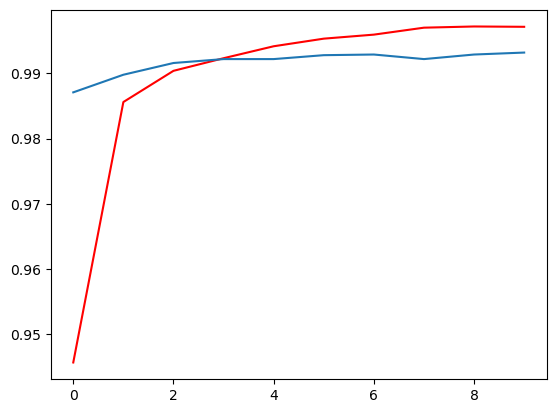

In [9]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='red', label='acc')
plt.plot(hist.history['val_accuracy'], label='val_acc')
fig.show()

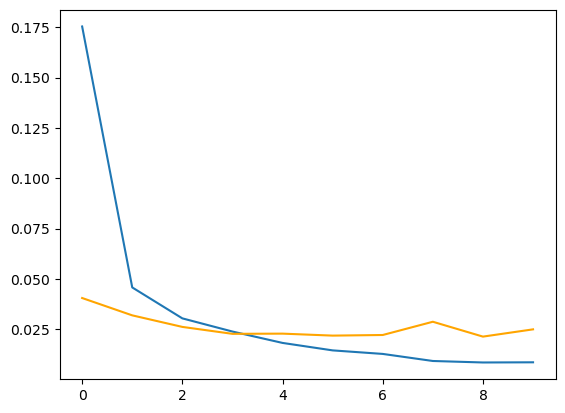

In [10]:
fig
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')

In [11]:
predictions_original = model.predict(X_test)
rounded_predictions = np.apply_along_axis(lambda x: np.round(x), 1, predictions_original)

In [12]:
rounded_predictions

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
predictions = tf.argmax(rounded_predictions, axis=1)
y_test_argmax = tf.argmax(y_test, axis=1)


In [14]:
cm = tf.math.confusion_matrix(y_test_argmax, predictions)
cm = cm/cm.numpy().sum(axis=1)[:, tf.newaxis]

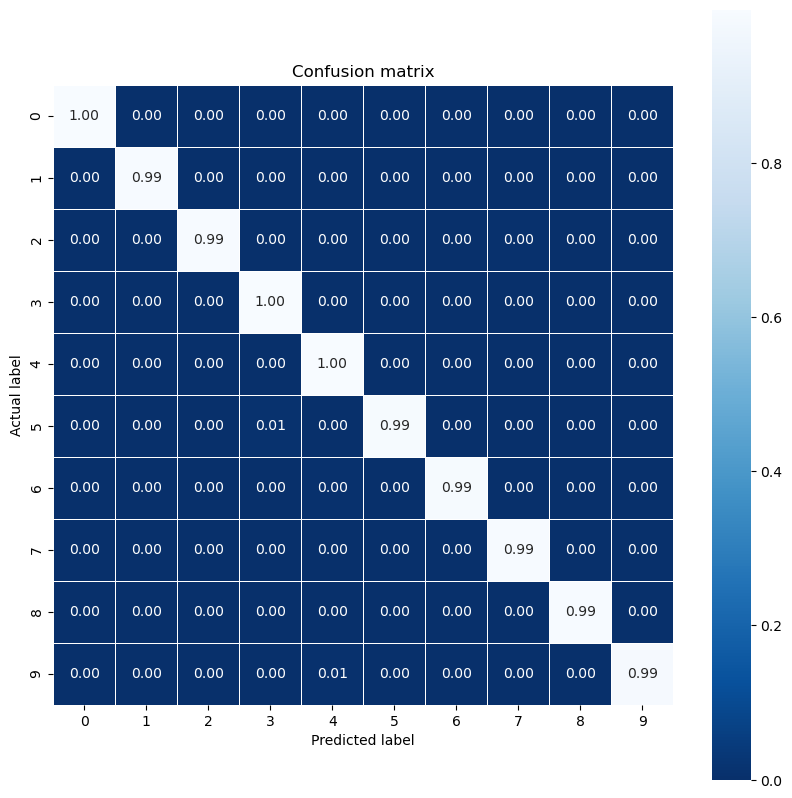

In [15]:
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=0.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Confusion matrix")
plt.show()

In [17]:
ld_model = tf.keras.models.load_model(os.path.join('idx_models', "idx_model_0.h5"))

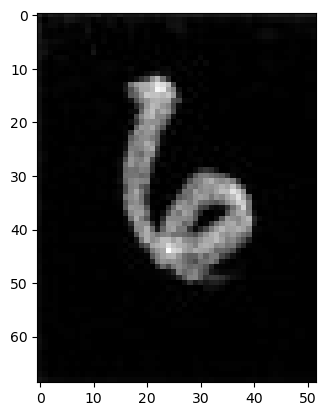

In [19]:
import cv2
# Load the image in grayscale
img = cv2.imread(os.path.join('col_idx', 'scan0004.jpg-fifth.jpg'), cv2.IMREAD_GRAYSCALE)
img = np.invert(img)
plt.imshow(img, cmap='gray')
# Reshape and normalize the image
img = np.expand_dims(img, axis=-1)  # Add an extra axis for the single channel
img = np.expand_dims(img, axis=0)  # Add batch dimension
img = img / 255.0  # Normalize the pixel values

# Resize the image using tf.image.resize
img = tf.image.resize(img, [28, 28])


prediction = ld_model.predict(img)

In [20]:
prediction

array([[0.05765093, 0.02676362, 0.04281959, 0.06108957, 0.06336313,
        0.08619896, 0.5826832 , 0.02247845, 0.04349124, 0.01346126]],
      dtype=float32)

In [21]:
np.argmax(prediction)

6